In [1]:
import os
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white', font_scale=1.5)

In [2]:
from mks import get_mks
from impres import get_impres
from ifng import get_ifng
from tide import get_tide

import sys,os
sys.path.insert(0, '/home/was966/Research/PSOG/')
from gdd.score import Xy_score

In [3]:
data_path = '/n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/TCGA-ITRP-MERGE/18425/'
itrp_tpm = pd.read_pickle(os.path.join(data_path, 'TPM.ITRP.TABLE'))
itrp_patient = pd.read_pickle(os.path.join(data_path, 'PATIENT.ITRP.TABLE'))
dfp1 = itrp_tpm.join(itrp_patient.cohort)


In [4]:
cohorts = ['Riaz', 'Hugo', 'Allen',  'MGH', 'Gide', 'Liu']

prcs = []
rocs = []
for cohort in cohorts:
    dfc = dfp1[dfp1.cohort == cohort]
    df_tpm = dfc[dfc.columns[:-1]]
    y_col = 'RECIST_Response'
    dfy = df_tpm.join(itrp_patient[y_col])[y_col]
    tmb = itrp_patient['tmb.wang']
    tmb.name = 'TMB'
    
    dfs1 = get_mks(df_tpm)
    dfs2 = get_impres(df_tpm)
    dfs3 = get_ifng(df_tpm)
    dfs4 = get_tide(df_tpm)
    
    dfs = dfs1.join(dfs2).join(dfs3).join(dfs4[['TIDE', 'IFNG', 'MSI Score','CTL']]).join(tmb)
    
    dfxy = dfs.join(dfy) #.dropna()
    
    prc = Xy_score(dfxy, y_col, method='prc').prc
    roc = Xy_score(dfxy, y_col, method='roc').roc

    prc.name = cohort
    roc.name = cohort
    prcs.append(prc)
    rocs.append(roc)

/home/was966/Research/PSOG/gdd/model/ifng.py:43: UserWarning: Markers of [] are missed and not used.
  warnings.warn('Markers of %s are missed and not used.' % markers_unused)


[WARN] 4.66 % Genes are missing after converting to Entrez ID


100%|##########| 21/21 [00:00<00:00, 2784.71it/s]
/home/was966/Research/PSOG/gdd/model/ifng.py:43: UserWarning: Markers of [] are missed and not used.
  warnings.warn('Markers of %s are missed and not used.' % markers_unused)


[WARN] 4.66 % Genes are missing after converting to Entrez ID


100%|##########| 21/21 [00:00<00:00, 1540.78it/s]
/home/was966/Research/PSOG/gdd/model/ifng.py:43: UserWarning: Markers of [] are missed and not used.
  warnings.warn('Markers of %s are missed and not used.' % markers_unused)


[WARN] 4.66 % Genes are missing after converting to Entrez ID


100%|##########| 21/21 [00:00<00:00, 1228.56it/s]
/home/was966/Research/PSOG/gdd/model/ifng.py:43: UserWarning: Markers of [] are missed and not used.
  warnings.warn('Markers of %s are missed and not used.' % markers_unused)


[WARN] 4.66 % Genes are missing after converting to Entrez ID


100%|##########| 21/21 [00:00<00:00, 3141.69it/s]
/home/was966/Research/PSOG/gdd/model/ifng.py:43: UserWarning: Markers of [] are missed and not used.
  warnings.warn('Markers of %s are missed and not used.' % markers_unused)


[WARN] 4.66 % Genes are missing after converting to Entrez ID


100%|##########| 21/21 [00:00<00:00, 2652.62it/s]
/home/was966/Research/PSOG/gdd/model/ifng.py:43: UserWarning: Markers of [] are missed and not used.
  warnings.warn('Markers of %s are missed and not used.' % markers_unused)


[WARN] 4.66 % Genes are missing after converting to Entrez ID


100%|##########| 21/21 [00:00<00:00, 1354.71it/s]


Text(-27.875000000000014, 0.5, '')

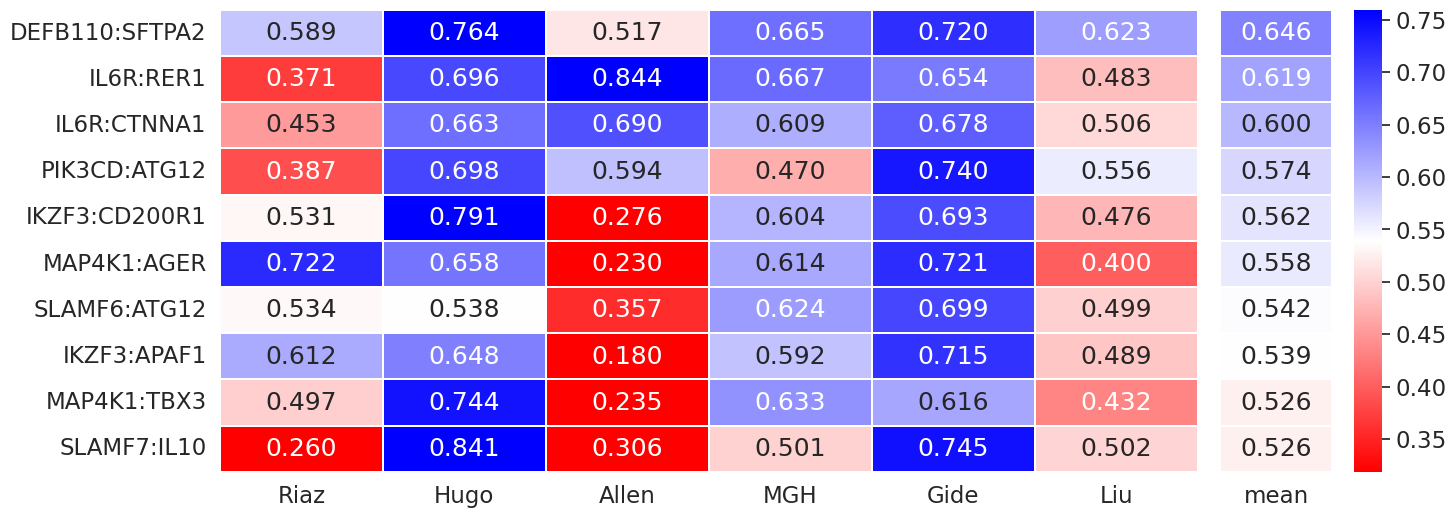

In [15]:
s = pd.concat(prcs, axis=1)

s1 = pd.concat(prcs, axis=1).iloc[:10]
s2 = pd.concat(prcs, axis=1).iloc[10:]

s1 = s1.loc[s1.apply(lambda x:np.nanmean(x), axis=1).sort_values(ascending=False).index]
s2 = s2.loc[s2.apply(lambda x:np.nanmean(x), axis=1).sort_values(ascending=False).index]

fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, figsize=(15, 6),  gridspec_kw={'width_ratios': [7, 0.8, 0.2]}, sharey=False, )

vmin = s.min().mean()
vmax = s.max().mean()

sns.heatmap(s1, cmap = 'bwr_r', ax=ax1, annot=True,  vmin = vmin, linewidths=.1, cbar_ax = ax3, fmt='.3f',
            vmax = vmax, annot_kws={"fontsize":18}, cbar=True)

sns.heatmap(s1.mean(axis=1).to_frame(name='mean'), cmap = 'bwr_r', ax=ax2, annot=True, linewidths=.1,fmt='.3f',
            vmin = vmin, vmax = vmax, annot_kws={"fontsize":18}, cbar=False)

ax2.set_yticklabels([])

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.06, hspace=None)

ax2.set_ylabel('')
ax1.set_ylabel('')



Text(56.249999999999986, 0.5, '')

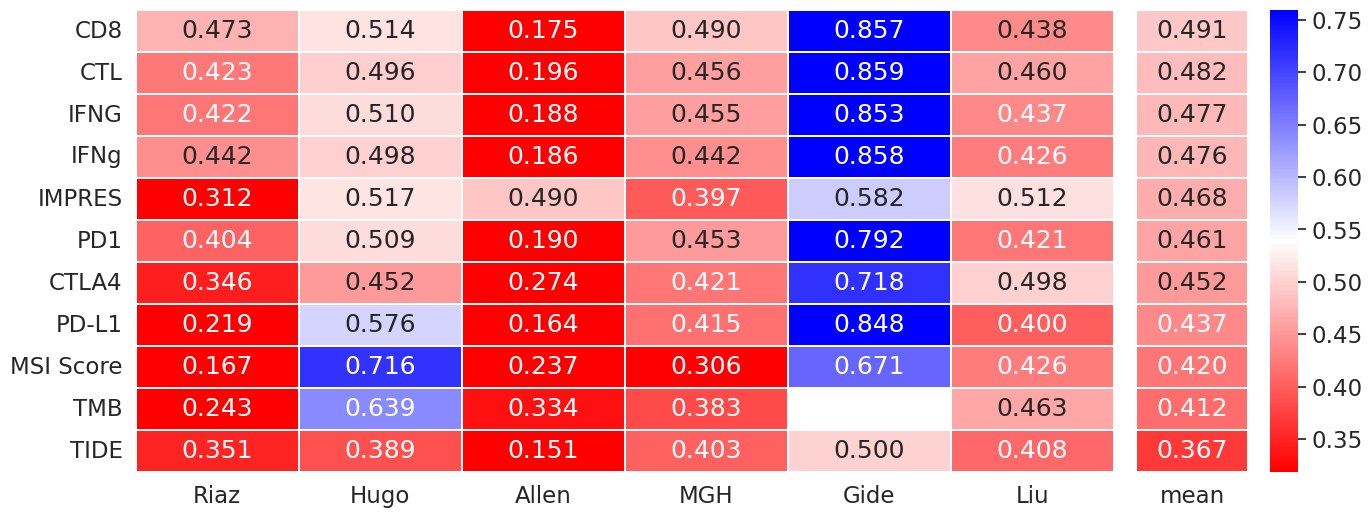

In [16]:
fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, figsize=(15, 6),  gridspec_kw={'width_ratios': [7, 0.8, 0.2]}, sharey=False, )

sns.heatmap(s2, cmap = 'bwr_r', ax=ax1, annot=True,  vmin = vmin, linewidths=.1, cbar_ax = ax3, fmt='.3f',
            vmax = vmax, annot_kws={"fontsize":18}, cbar=True)

sns.heatmap(s2.mean(axis=1).to_frame(name='mean'), cmap = 'bwr_r', ax=ax2, annot=True, linewidths=.1,fmt='.3f',
            vmin = vmin, vmax = vmax, annot_kws={"fontsize":18}, cbar=False)

ax2.set_yticklabels([])

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.06, hspace=None)

ax2.set_ylabel('')
ax1.set_ylabel('')


Text(-27.875000000000014, 0.5, '')

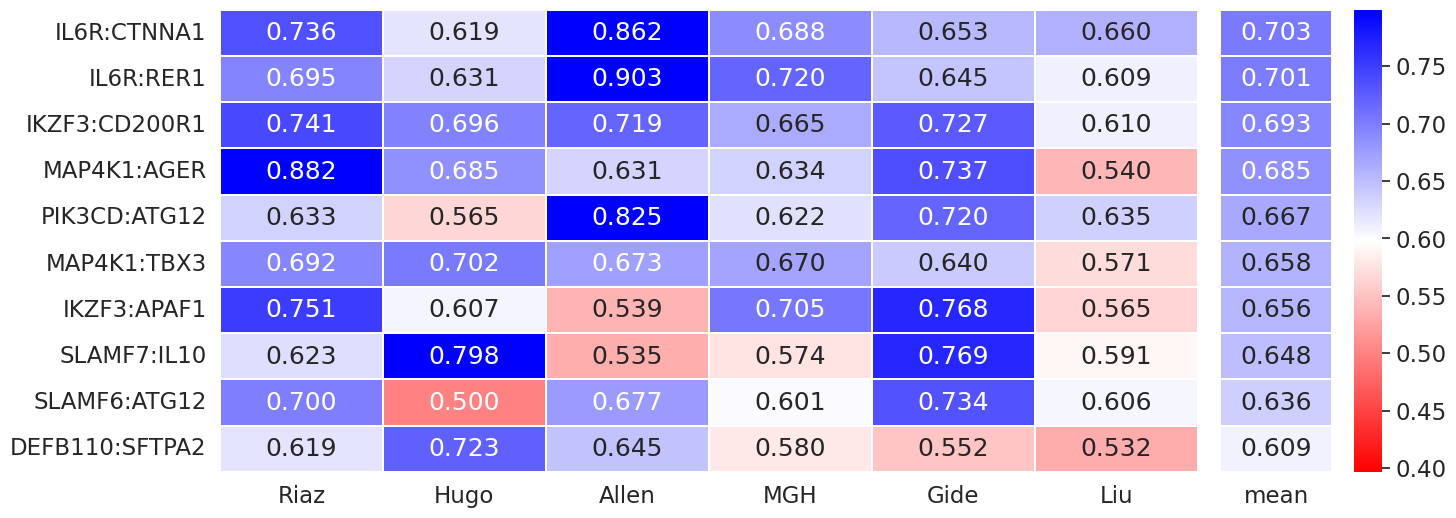

In [18]:
s = pd.concat(rocs, axis=1)

s1 = pd.concat(rocs, axis=1).iloc[:10]
s2 = pd.concat(rocs, axis=1).iloc[10:]

s1 = s1.loc[s1.apply(lambda x:np.nanmean(x), axis=1).sort_values(ascending=False).index]
s2 = s2.loc[s2.apply(lambda x:np.nanmean(x), axis=1).sort_values(ascending=False).index]

fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, figsize=(15, 6),  gridspec_kw={'width_ratios': [7, 0.8, 0.2]}, sharey=False, )

vmin = s.min().mean()
vmax = s.max().mean()

sns.heatmap(s1, cmap = 'bwr_r', ax=ax1, annot=True,  vmin = vmin, linewidths=.1, cbar_ax = ax3, fmt='.3f',
            vmax = vmax, annot_kws={"fontsize":18}, cbar=True)

sns.heatmap(s1.mean(axis=1).to_frame(name='mean'), cmap = 'bwr_r', ax=ax2, annot=True, linewidths=.1,fmt='.3f',
            vmin = vmin, vmax = vmax, annot_kws={"fontsize":18}, cbar=False)

ax2.set_yticklabels([])

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.06, hspace=None)

ax2.set_ylabel('')
ax1.set_ylabel('')

Text(56.249999999999986, 0.5, '')

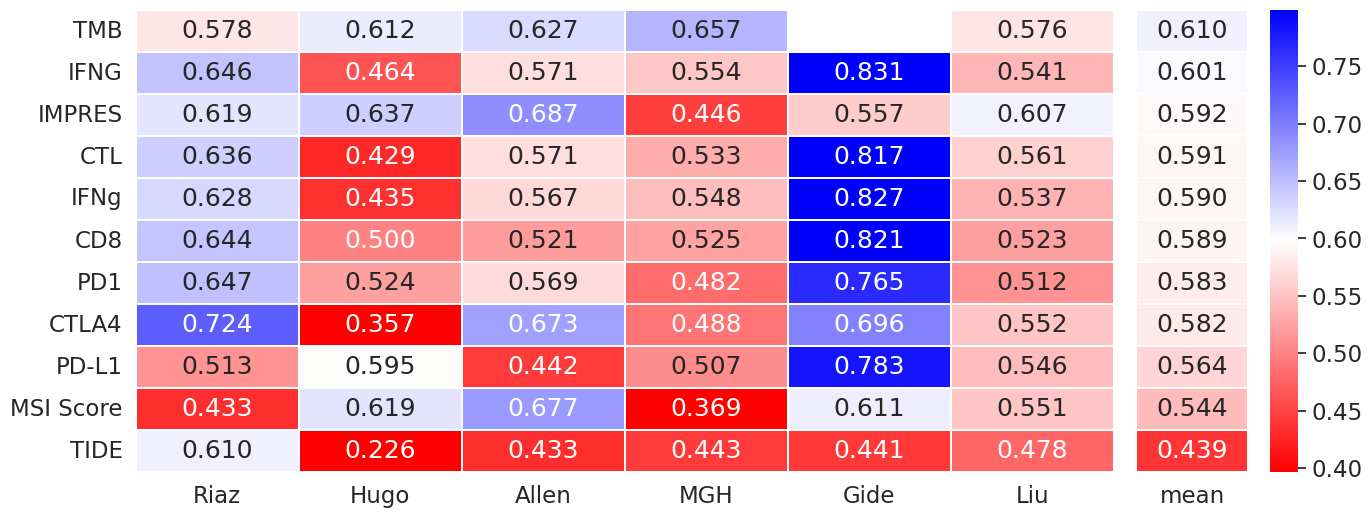

In [19]:


fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, figsize=(15, 6),  gridspec_kw={'width_ratios': [7, 0.8, 0.2]}, sharey=False, )

sns.heatmap(s2, cmap = 'bwr_r', ax=ax1, annot=True,  vmin = vmin, linewidths=.1, cbar_ax = ax3, fmt='.3f',
            vmax = vmax, annot_kws={"fontsize":18}, cbar=True)

sns.heatmap(s2.mean(axis=1).to_frame(name='mean'), cmap = 'bwr_r', ax=ax2, annot=True, linewidths=.1,fmt='.3f',
            vmin = vmin, vmax = vmax, annot_kws={"fontsize":18}, cbar=False)

ax2.set_yticklabels([])

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.06, hspace=None)

ax2.set_ylabel('')
ax1.set_ylabel('')


In [22]:
s1.round(3)

,Riaz,Hugo,Allen,MGH,Gide,Liu
gene_name,,,,,,
IL6R:CTNNA1,0.736,0.619,0.862,0.688,0.653,0.660
IL6R:RER1,0.695,0.631,0.903,0.720,0.645,0.609
IKZF3:CD200R1,0.741,0.696,0.719,0.665,0.727,0.610
MAP4K1:AGER,0.882,0.685,0.631,0.634,0.737,0.540
PIK3CD:ATG12,0.633,0.565,0.825,0.622,0.720,0.635
MAP4K1:TBX3,0.692,0.702,0.673,0.670,0.640,0.571
IKZF3:APAF1,0.751,0.607,0.539,0.705,0.768,0.565
SLAMF7:IL10,0.623,0.798,0.535,0.574,0.769,0.591
SLAMF6:ATG12,0.700,0.500,0.677,0.601,0.734,0.606
